Gus Marquez DS687

Captain's OpenCV Object Detection in Image

(Help for these code can be found in OpenCV and PYImageSearch)

Google Drive Mounted /content/drive/MyDrive/colab/

LOAD LIBRARIES and SETUP

In [ ]:

# Load Libraries
import cv2 
import matplotlib.pyplot as plt



[3 3] [0.7446855 0.6762122]


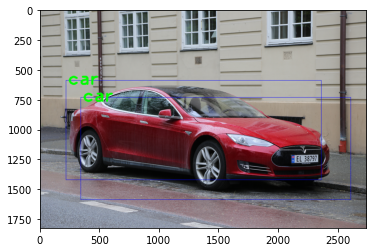

In [2]:
# Mobilnet Model
config_file = '/content/drive/MyDrive/colab/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = '/content/drive/MyDrive/colab/frozen_inference_graph.pb'
task = cv2.dnn_DetectionModel(frozen_model,config_file)
classLabels = []
# Labels
file_name = '/content/drive/MyDrive/colab/Labels.txt'
with open(file_name, 'rt') as f:
    classLabels = f.read().rstrip('\n').split('\n')

#TASKS...
task.setInputSize(340,340)
task.setInputScale(1.0/127.5)
task.setInputMean((127.5,127.5,127.5))
task.setInputSwapRB(True)
# GET Image from my drive
img = cv2.imread("/content/drive/MyDrive/testimg01.jpg")
plt.imshow(img)
#Report confidence
ClassIndex, confidece, bbox = task.detect(img,confThreshold=0.5)
print(ClassIndex, confidece)
#Box and Display
font_scale = 10
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale = font_scale,color=(0,255,0), thickness = 15)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

